<a href="https://colab.research.google.com/github/nenarossbce/Project2/blob/main/Project_2_AdultIncome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Project 2 - Part 2 (Adult Income)

Nena Esaw

###**Instructions:**

Using the approved dataset you proposed for Project 2 - Part 1 last week, you will clean and explore the data set.

To meet the requirements for this week you must have:

* Deleted unnecessary columns.
* Deleted duplicate rows.
* Identified and addressed missing values.
* Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
* Produced univariate visuals for the target and all features.
* Identified outliers.
* Clearly commented all of your cleaning steps and described any decisions you made.
* Commit your file to your Github repository and submit the link below.

###Data Dictionary
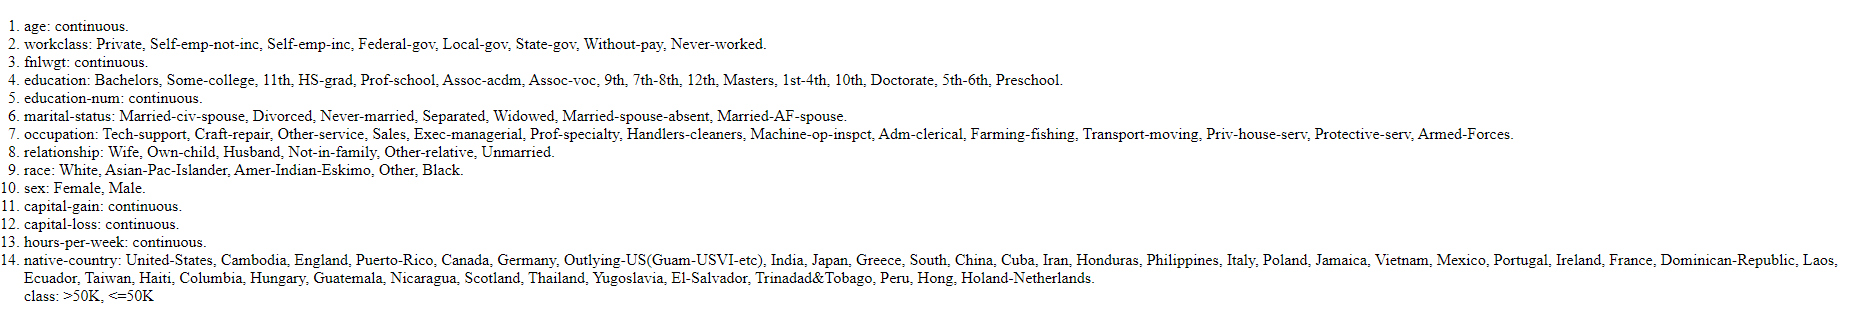

###Import libraries

In [1]:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# MatplotLib
import matplotlib.pyplot as plt
# SNS
import seaborn as sns

###Import and Inspect Data

In [2]:
fpath = '/content/drive/MyDrive/Colab Notebooks/Projects/adult.csv'
df = pd.read_csv(fpath)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
#Display rows and columns
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')

There are 48842 rows, and 15 columns.


In [ ]:
#Display the column names, counts of non-null values and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


###Clean Data

####Check for the duplicates

In [3]:
#Check for duplicates
df.duplicated().sum()
print(f'There are {df.duplicated().sum()} duplicate rows')

There are 52 duplicate rows


In [4]:
#Drop the dulicate rows
df = df.drop_duplicates()
df.duplicated().sum()
print(f'There are {df.duplicated().sum()} duplicate rows')

There are 0 duplicate rows


####Check for Missing Values

In [5]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 0 missing values.


####Check for impossible values in numeric columns

In [6]:
# Check for and address any impossible values in numeric columns.
df.describe(include='number')

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


* Capital-gain and capital-loss doesn't seem to have a lot of data.
* Fnlwgt might not add any value to our predications. We will need to explore this column more.  
* We also need to determine if there is a need for educational-num.

####Check for inconsistent values in categorical columns

In [7]:
# Check for and address any inconsistent values in categorical columns.
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48790,48790,48790,48790,48790,48790,48790,48790,48790
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33860,15770,22366,6165,19703,41714,32614,43792,37109


* Native-Country has high cardinality and can be dropped

In [8]:
df.drop (['native-country','capital-loss', 'capital-gain'], axis=1, inplace =True)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,30,<=50K


In [9]:
#Identify string columns
string_cols = df.select_dtypes('object').columns
string_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'income'],
      dtype='object')

In [10]:
#Obtain the value count for all string columns
for col in string_cols:
  print(f'Value counts for {col}')
  print(df[col].value_counts())
  print ('\n')

Value counts for workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


Value counts for education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64


Value counts for marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64


Value coun

###Remove the "?" in Occupation and Workclass

In [11]:
#Look a value counts for Occupation
df['occupation'].value_counts()

Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
?                    2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

In [12]:
#Change ? to NaN
df['occupation'].replace({'?':np.NaN}, inplace=True)
df['occupation'].value_counts()

Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

In [13]:
#Check value counts for Workclass
df['workclass'].value_counts()

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [14]:
#Change ? to NaN
df['workclass'].replace({'?':np.NaN}, inplace=True)
df['workclass'].value_counts()

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

###Explore the Data

####Define a function that will be used to explore categorical features

In [15]:
# Function to explore all categorical features
def explore_categorical(df, x, figsize = (6,6)):
   # Before filling nulls, save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
   # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=df, x=x, ax=ax)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax



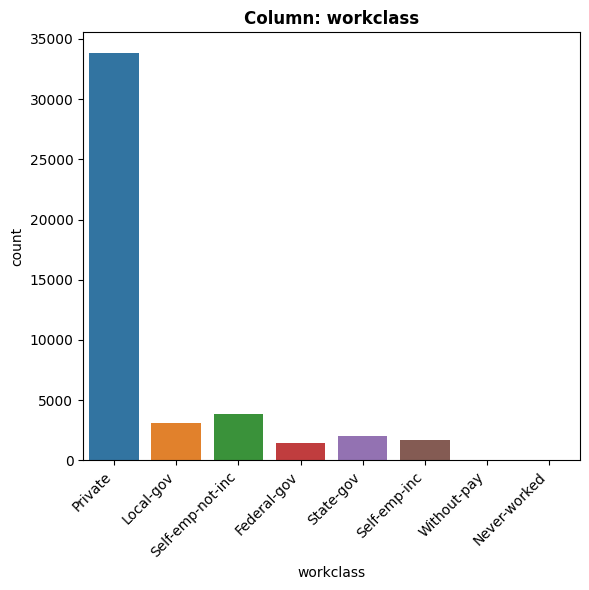

- NaN's Found: 2795 (5.73%)
- Unique Values: 8
- Most common value: 'Private' occurs 33860 times (69.4%)
- Not constant or quasi-constant.


In [16]:
explore_categorical(df, 'workclass');

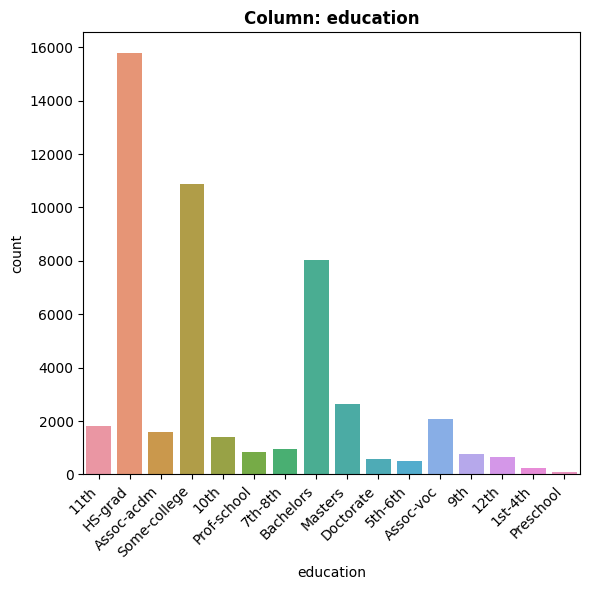

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'HS-grad' occurs 15770 times (32.32%)
- Not constant or quasi-constant.


In [17]:
explore_categorical(df, 'education');

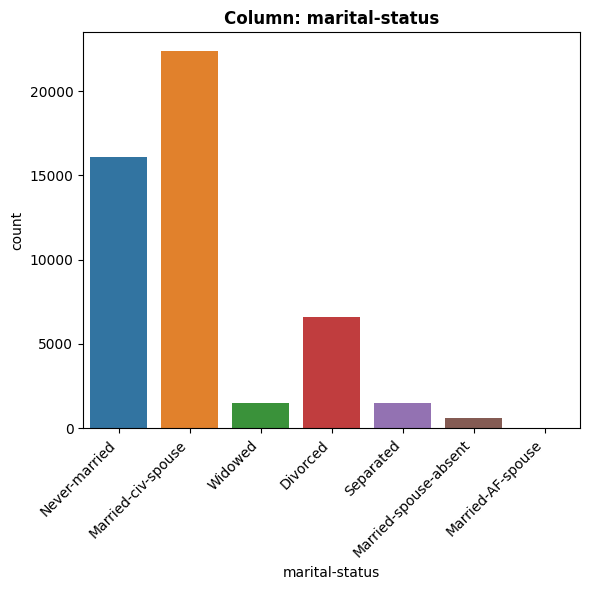

- NaN's Found: 0 (0.0%)
- Unique Values: 7
- Most common value: 'Married-civ-spouse' occurs 22366 times (45.84%)
- Not constant or quasi-constant.


In [18]:
explore_categorical(df, 'marital-status');

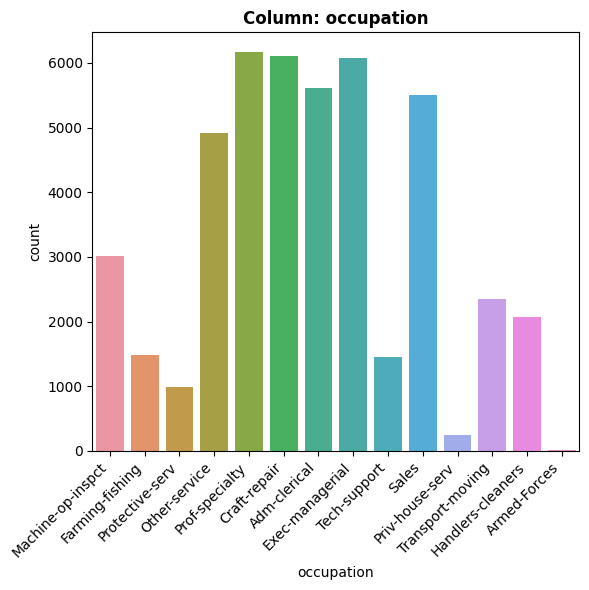

- NaN's Found: 2805 (5.75%)
- Unique Values: 14
- Most common value: 'Prof-specialty' occurs 6165 times (12.64%)
- Not constant or quasi-constant.


In [19]:
explore_categorical(df, 'occupation');

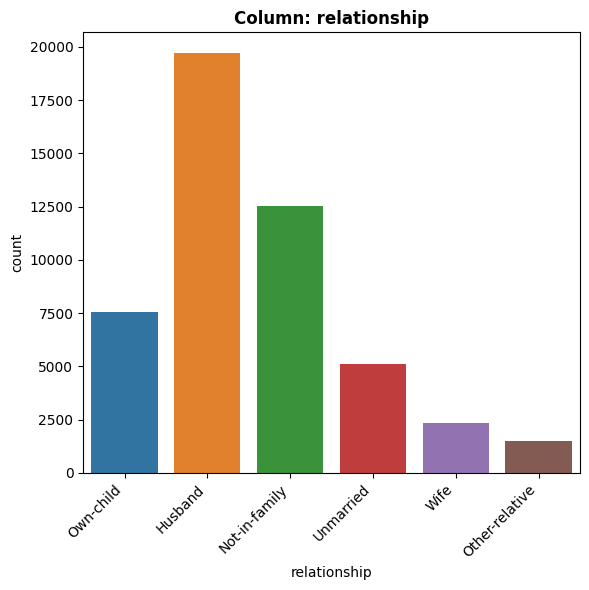

- NaN's Found: 0 (0.0%)
- Unique Values: 6
- Most common value: 'Husband' occurs 19703 times (40.38%)
- Not constant or quasi-constant.


In [20]:
explore_categorical(df, 'relationship');

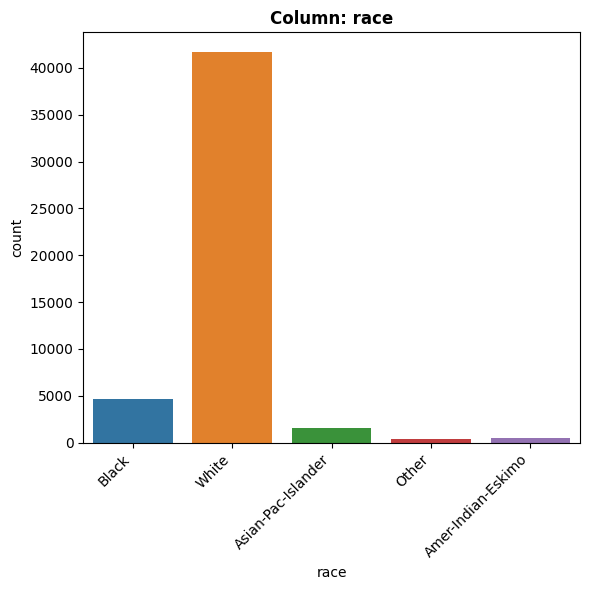

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'White' occurs 41714 times (85.5%)
- Not constant or quasi-constant.


In [21]:
explore_categorical(df, 'race');

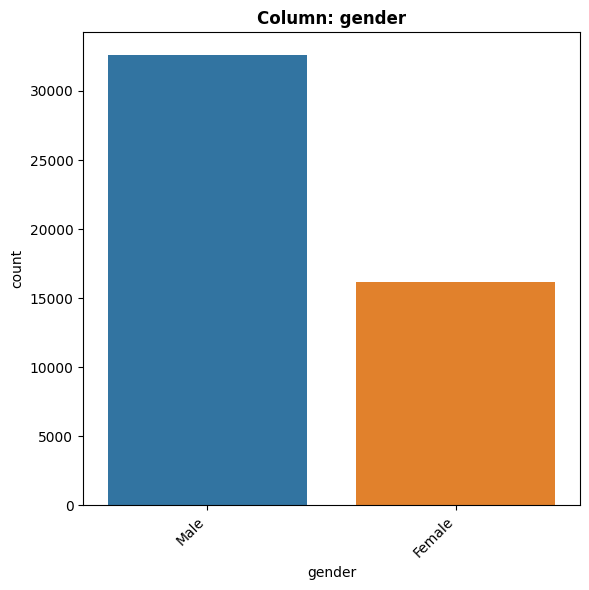

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Male' occurs 32614 times (66.85%)
- Not constant or quasi-constant.


In [22]:
explore_categorical(df, 'gender');

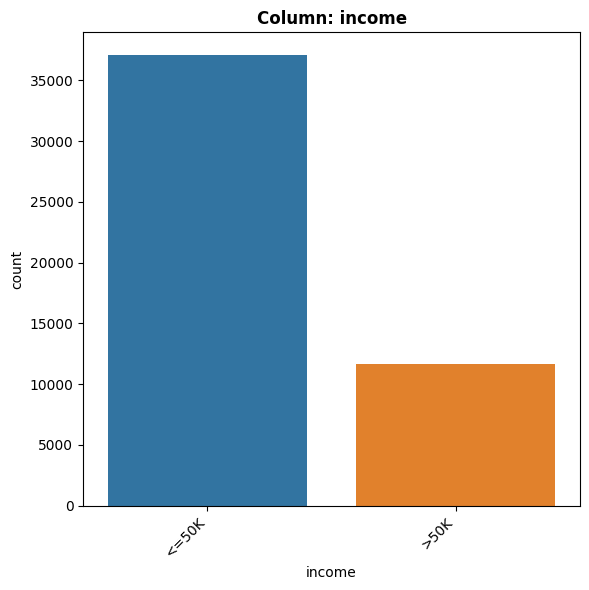

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '<=50K' occurs 37109 times (76.06%)
- Not constant or quasi-constant.


In [23]:
explore_categorical(df, 'income');

####Define a function that will be used to explore numeric features

In [24]:
def explore_numeric(df, x, figsize=(6,4) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

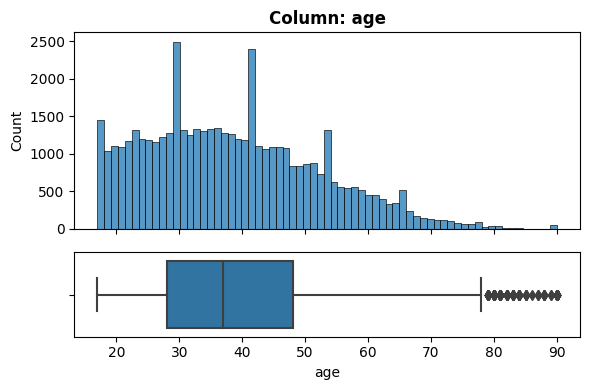

- NaN's Found: 0 (0.0%)


In [25]:
explore_numeric(df, 'age');

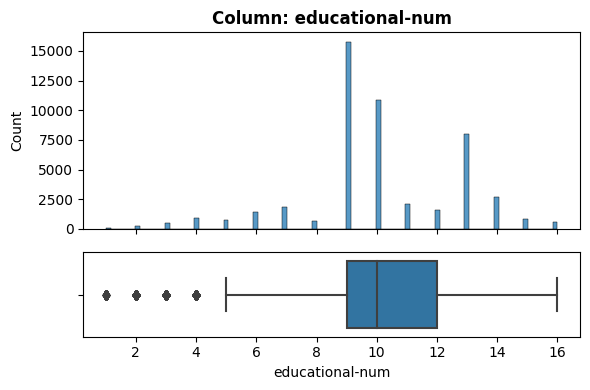

- NaN's Found: 0 (0.0%)


In [26]:
explore_numeric(df, 'educational-num');

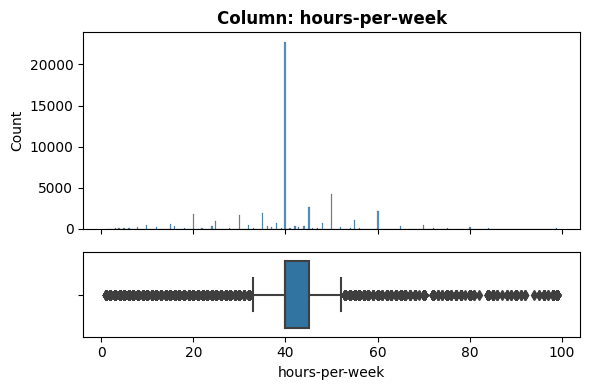

- NaN's Found: 0 (0.0%)


In [29]:
explore_numeric(df, 'hours-per-week');

#Project 2 - Part 3

Instructions:

1. For this part of the project, you will continue your data exploration by:
 1.  Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.

 2. Creating multivariate (multiple variables) exploratory visualizations to understand your data and search for trends.

2. Then, choose two visualizations from your analysis that demonstrate key trends you found that will be of interest to a stakeholder. These visuals should be reporting-quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the insight associated with each visual. Both of these visualizations should be easily understood by a non-technical audience (Neither of these should be histograms, boxplots, or correlation plots).

  1. These plots should be so simple and so easy to read that a 6th grader could understand them in less than 10 seconds without asking questions. They don't need to be fancy; they need to CLEARLY show an interesting trend or correlation between features in your data.

###Identifying correlations between target and features

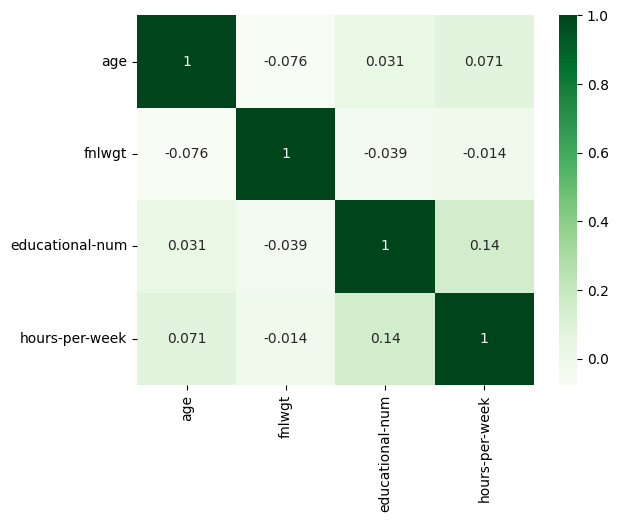

In [32]:
#Using a heatmap to determine numerical correlations
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap = 'Greens', annot = True);

* We can determine from this heatmap that are no correlations with the numerical values.

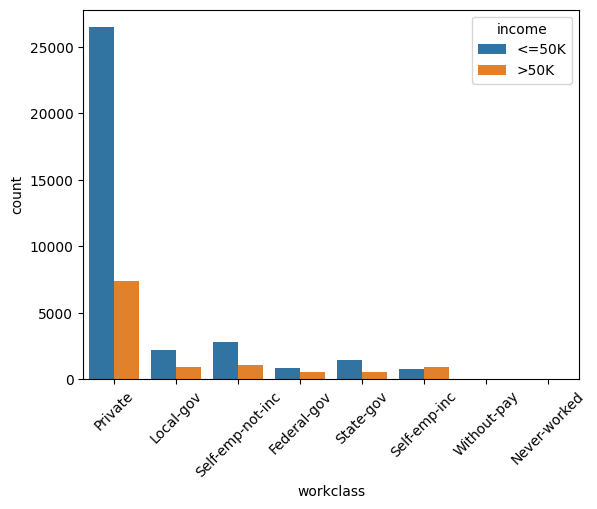

In [33]:
ax = sns.countplot(data=df, x='workclass', hue='income')
ax.tick_params(axis='x', rotation = 45);

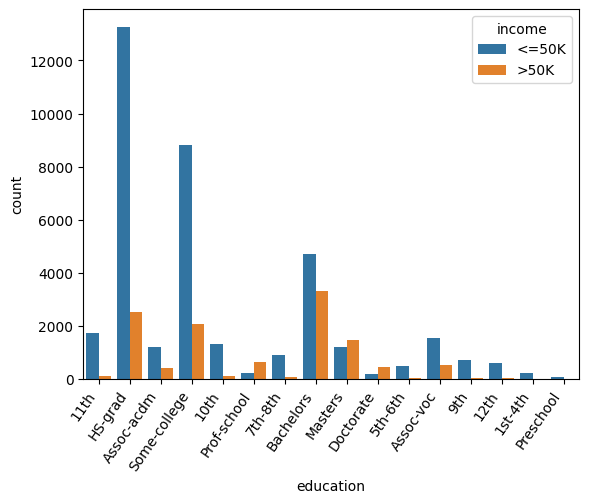

In [34]:
ax = sns.countplot(data=df, x='education', hue='income')
ax.set_xticklabels(ax.get_xticklabels(), rotation=55, ha='right');

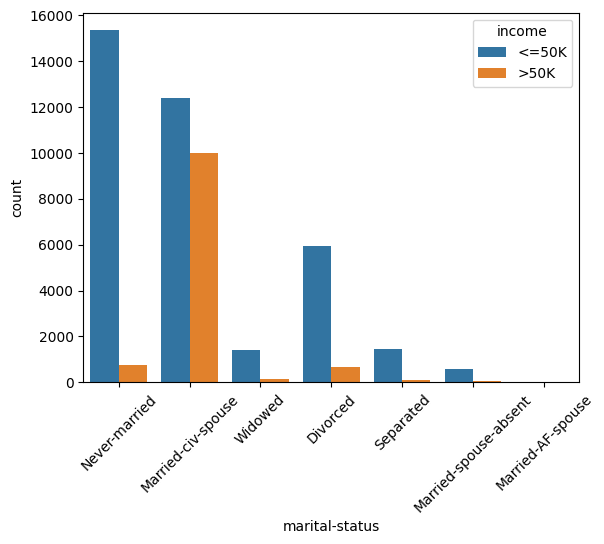

In [35]:
ax = sns.countplot(data=df, x='marital-status', hue='income')
ax.tick_params(axis='x', rotation = 45);

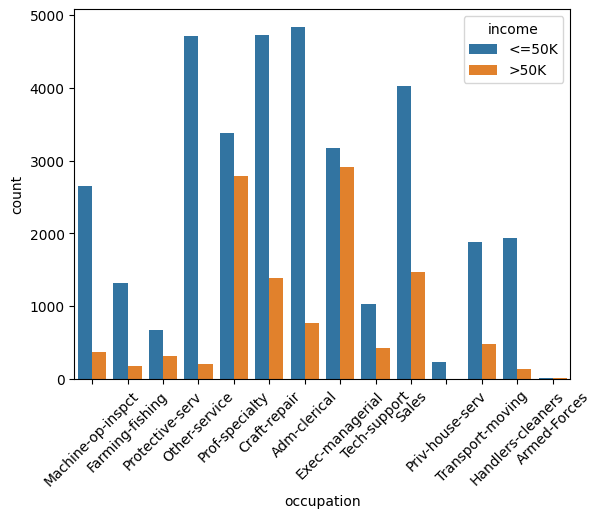

In [36]:
ax = sns.countplot(data=df, x='occupation', hue='income')
ax.tick_params(axis='x', rotation = 45);

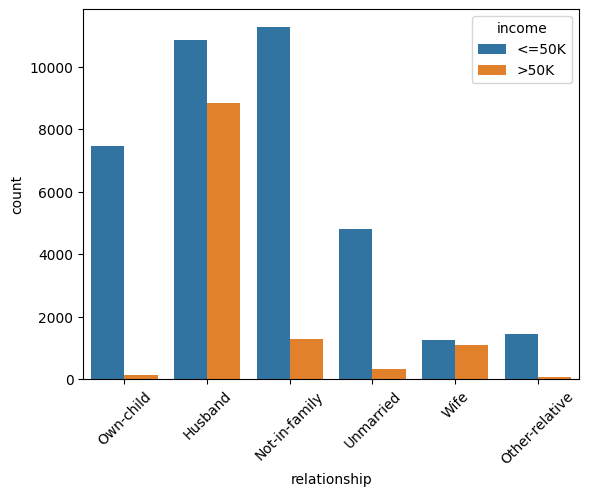

In [37]:
ax = sns.countplot(data=df, x='relationship', hue='income')
ax.tick_params(axis='x', rotation = 45);

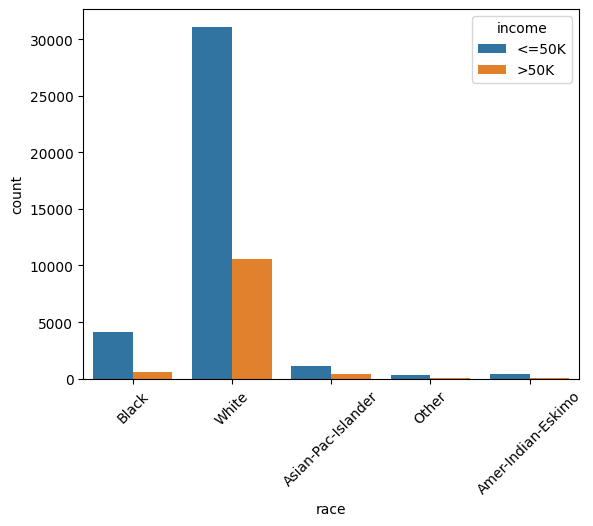

In [38]:
ax = sns.countplot(data=df, x='race', hue='income')
ax.tick_params(axis='x', rotation = 45);

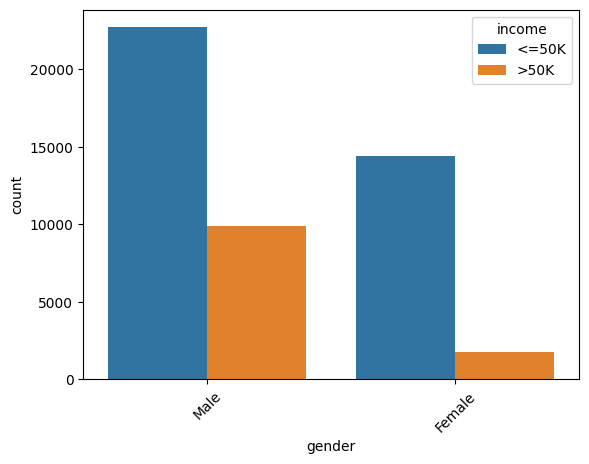

In [39]:
ax = sns.countplot(data=df, x='gender', hue='income')
ax.tick_params(axis='x', rotation = 45);

###Visualaztions that demostrate key trends with income

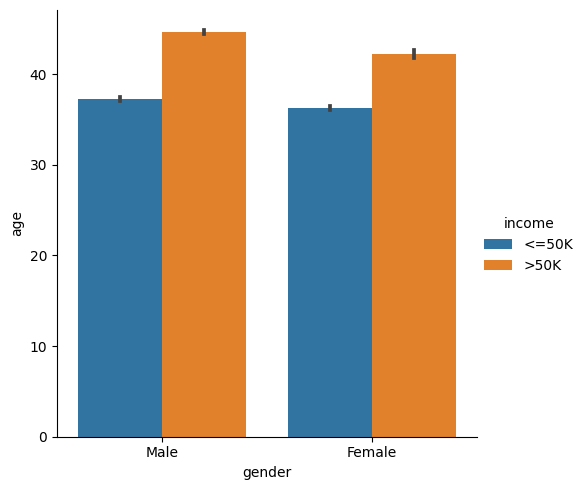

In [54]:
sns.catplot(data=df, x="gender", y="age", hue="income", kind="bar");

* We can see that more male over the age of 40 generate a higher income over 50k than compared to females.
* Females over the age 40 make over 50k as well but not as much as males.
* We can determine that over the over of 40 for both male and females they generate a higher income.

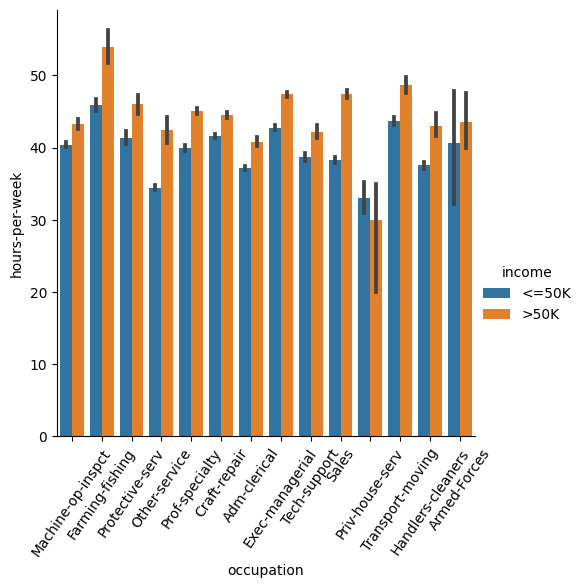

In [53]:
ax = sns.catplot(data=df, x='occupation', y='hours-per-week', hue='income', kind='bar')
ax.tick_params(axis='x',rotation=55);

* This graph shows up that Machine-Op-Inspector generate a higher income and work more than 50 hours per week.
* We can also see that a majority of the work class that work over 40 hours per week generate over 50k income.